<a href="https://colab.research.google.com/github/ErnestoCash/ASAP/blob/main/PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [4]:
import tensorflow as tf
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed


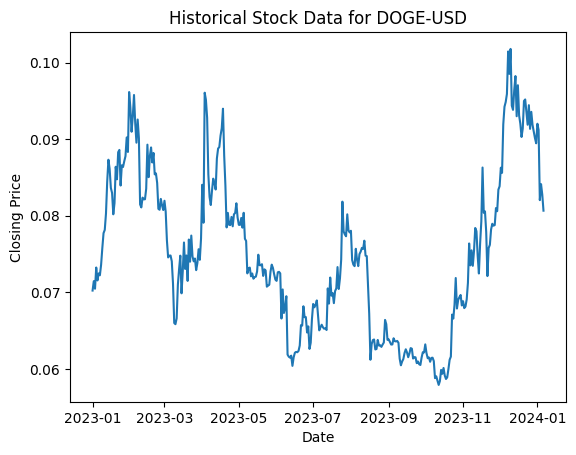

In [5]:
# Load stock data from Yahoo FinanceCargar data de accion de Yahoo Finance ( Escoger una por una)
ticker = "DOGE-USD"
start_date = "2023-01-01"
end_date = "2024-01-7"
data = yf.download(ticker, start=start_date, end=end_date)
# Plot the data
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Stock Data for {}'.format(ticker))
plt.show()

In [6]:
# Preprocesamiento de los datos
x = data['Close'][:-1]   # Usar TODOS los datos excepto el primero para entranar al modelo
y = data['Close'][1:]    # Predecir el precio de cierre del siguiente dia
x = np.array(x)
y = np.array(y)
x = np.reshape(x, (len(x), 1))

In [7]:
# Definir el modelo
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [8]:
# Compiar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')


In [9]:
# ENtrenar el modelo
modelo.fit(x, y, epochs=200)

Epoch 1/200
12/12 [==============================] - 1s 7ms/step - loss: 0.0207
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 8.4718e-04
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 3.2026e-04
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 1.7846e-04
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 1.4270e-04
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 1.3783e-04
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 1.3568e-04
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 1.2461e-04
Epoch 10/200
12/12 [==============================] - 0s 3ms/step - loss: 1.1720e-04
Epoch 11/200
12/12 [==============================] - 0s 4ms/step - loss: 1.2255e-04
Epoch 12/200
12/12 [==============================] - 0s 4ms/step - loss: 1.1479e-

In [10]:
# Predecir el precio para el siguiente dia
next_day_price = modelo.predict(np.array([x[-1]]))
print("Predicted next day price:", next_day_price)

1/1 [==============================] - 0s 146ms/step
Predicted next day price: [[0.07776024]]


In [11]:
# Get the current stock price
ticker_info = yf.Ticker(ticker)
current_price = ticker_info.history(period="1d")['Close'].iloc[-1]
print("Current stock price:", current_price)

Current stock price: 0.07894158363342285
